**Logistics Regressions**

Importing the Python data and libraries

In [ ]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




**Data cleaning**

In [ ]:
df = pd.read_csv(r'dataset-of-00s.csv') 
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [ ]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [ ]:
df = df[df.speechiness < 0.66]

df['speechiness'].max()
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


In [ ]:
# Statisitical overview of the data
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000,5.860000e+03,5860.000000,5860.000000,5860.000000,5860.000000
mean,0.542838,0.694891,5.275256,-7.438595,0.644881,0.090878,0.213459,0.151037,0.195837,0.482360,121.655627,2.578677e+05,3.914505,40.758100,11.044369,0.500853
std,0.190159,0.237727,3.565806,5.099878,0.478590,0.089153,0.295795,0.301605,0.161258,0.254645,30.177000,1.379595e+05,0.402282,20.242908,5.689563,0.500042
min,0.058800,0.000348,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.019300,0.000000,46.755000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.416000,0.568000,2.000000,-8.294500,0.000000,0.036100,0.004508,0.000000,0.093700,0.278000,96.989000,2.069832e+05,4.000000,27.508472,9.000000,0.000000
50%,0.556000,0.744000,5.000000,-6.031500,1.000000,0.052600,0.059900,0.000022,0.130500,0.486000,120.000000,2.380400e+05,4.000000,36.048045,10.000000,1.000000
75%,0.681000,0.885000,8.000000,-4.559500,1.000000,0.106000,0.310000,0.047275,0.263000,0.687000,141.620250,2.789648e+05,4.000000,47.902385,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.654000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [ ]:
# Removing the columns that do not correlate to the songs characteristics
df = df.drop(['track','artist', 'uri', 'speechiness', 'liveness'], axis=1)
df.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.368000,0.00000,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.018500,0.00000,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.000111,0.00457,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.000007,0.07840,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.363000,0.00000,0.631,112.098,193760,4,22.62384,10,1


In [ ]:
def target_check(x):
  if x!=0:
      return 1
  else:
      return 0

df['target_check'] = df['target'].apply(target_check)


In [ ]:
df.groupby('target_check').mean()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
target_check,,,,,,,,,,,,,,
0,0.455361,0.674959,5.290256,-9.207990,0.598291,0.279367,0.293699,0.410698,123.031826,276883.548376,3.858803,42.684253,11.611624,0.0
1,0.630016,0.714756,5.260307,-5.675229,0.691312,0.147775,0.008861,0.553778,120.284116,238916.638160,3.970017,38.838510,10.479046,1.0


In [ ]:
df.groupby('target_check').min()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
target_check,,,,,,,,,,,,,,
0,0.0588,0.000348,0,-47.327,0,0.000000,0.0,0.0000,46.755,15920,0,0.00000,1,0
1,0.1130,0.107000,0,-17.224,0,0.000002,0.0,0.0388,59.972,111333,1,13.55298,3,1


In [ ]:
df.groupby('target_check').max()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
target_check,,,,,,,,,,,,,,
0,0.968,0.999,11,1.137,1,0.996,0.998,0.982,213.233,4170227,5,206.9273,169,0
1,0.986,0.996,11,-0.884,1,0.994,0.982,0.973,210.857,992160,5,262.6154,29,1


**Model 1**

Logistic Regression - Model 1

In [ ]:
X = df.drop(['target','target_check'],axis=1)

X.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.578,0.471,4,-7.270,1,0.368000,0.00000,0.532,133.061,196707,4,30.88059,13
1,0.704,0.854,10,-5.477,0,0.018500,0.00000,0.688,92.988,242587,4,41.51106,10
2,0.162,0.836,9,-3.009,1,0.000111,0.00457,0.300,86.964,338893,4,65.32887,13
3,0.188,0.994,4,-3.745,1,0.000007,0.07840,0.333,148.440,255667,4,58.59528,9
4,0.630,0.764,2,-4.353,1,0.363000,0.00000,0.631,112.098,193760,4,22.62384,10


In [ ]:
Y = df.target_check

Y.head()

0    1
1    1
2    0
3    0
4    1
Name: target_check, dtype: int64

In [ ]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.6109215017064846

Model accuracy - Model 1

In [ ]:
# Create LogisticRegression model
log_model1 = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)


# Fit our data
log_model1.fit(X_train,Y_train)

# Predict the classes of the testing data set
class_predict = log_model1.predict(X_test)
metrics.accuracy_score(Y_test,class_predict)


0.4955631399317406

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = log_model1.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[393, 342],
       [397, 333]])

 analysis on model 1

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,danceability,[0.014106871649323633]
1,energy,[0.004219496800757167]
2,key,[0.019362636534087208]
3,loudness,[0.18325112478777847]
4,mode,[0.00849153318186722]
5,acousticness,[-0.0068195796969593965]
6,instrumentalness,[-0.017862652540889278]
7,valence,[0.010986431705998282]
8,tempo,[0.006578535914822778]
9,duration_ms,[-6.336440072010275e-07]


In [ ]:
from sklearn.linear_model import LogisticRegression

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_model1.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

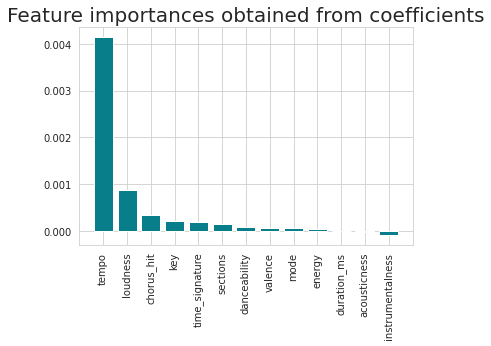

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Model 2

In [ ]:
# Dropping the attributes with least importance (coeffient closer to 0)
X2 = df.drop(['acousticness','duration_ms','instrumentalness','target','target_check'],axis=1)

X2.head()

,danceability,energy,key,loudness,mode,valence,tempo,time_signature,chorus_hit,sections
0,0.578,0.471,4,-7.270,1,0.532,133.061,4,30.88059,13
1,0.704,0.854,10,-5.477,0,0.688,92.988,4,41.51106,10
2,0.162,0.836,9,-3.009,1,0.300,86.964,4,65.32887,13
3,0.188,0.994,4,-3.745,1,0.333,148.440,4,58.59528,9
4,0.630,0.764,2,-4.353,1,0.631,112.098,4,22.62384,10


In [ ]:
Y2 = df.target_check

Y2.head()

0    1
1    1
2    0
3    0
4    1
Name: target_check, dtype: int64

In [ ]:
# Create LogisticRegression model
log_model2A = LogisticRegression()

# Fit our data
log_model2A.fit(X2,Y2)

# Check our accuracy
log_model2A.score(X2,Y2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7815699658703071

Model accuracy - Model 2

In [ ]:
# Create LogisticRegression model
log_model2 = LogisticRegression()

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2)


from sklearn.preprocessing import StandardScaler
#scaling the data
ss = StandardScaler()
X2_train_scaled = ss.fit_transform(X2_train)
X2_test_scaled = ss.transform(X2_test)

# Fit our data
log_model2.fit(X2_train_scaled,Y2_train)

# Predict the classes of the testing data set
class_predict2 = log_model2.predict(X2_test_scaled)
metrics.accuracy_score(Y2_test,class_predict2)

0.783617747440273

In [ ]:
y2_pred = log_model2.predict(X2_test_scaled)
confusion_matrix(Y2_test,y2_pred)

array([[560, 191],
       [126, 588]])

Analysis on model 2

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X2.columns,np.transpose(log_model2.coef_)))
coeff_df

,0,1
0,danceability,[1.0818252338496854]
1,energy,[-1.4123255360235318]
2,key,[0.004819744101662304]
3,loudness,[2.9181874545332778]
4,mode,[0.31691458775309217]
5,valence,[0.004550433245058721]
6,tempo,[0.08019751176600244]
7,time_signature,[0.11462432162091793]
8,chorus_hit,[-0.13392840575739975]
9,sections,[-0.3366555664939837]


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': log_model2.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

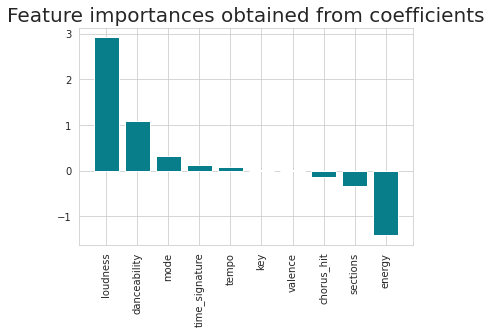

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

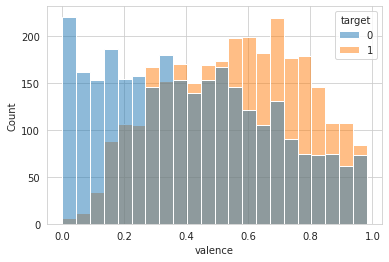

In [ ]:
sns.histplot(x='valence',data=df,hue='target')

Model 3

In [ ]:
X3 = X2.drop(['key','valence'],axis=1)

X3.head()

,danceability,energy,loudness,mode,tempo,time_signature,chorus_hit,sections
0,0.578,0.471,-7.270,1,133.061,4,30.88059,13
1,0.704,0.854,-5.477,0,92.988,4,41.51106,10
2,0.162,0.836,-3.009,1,86.964,4,65.32887,13
3,0.188,0.994,-3.745,1,148.440,4,58.59528,9
4,0.630,0.764,-4.353,1,112.098,4,22.62384,10


In [ ]:
Y3 = df.target_check

Y3.head()

0    1
1    1
2    0
3    0
4    1
Name: target_check, dtype: int64

In [ ]:
# Create LogisticRegression model
log_model3A = LogisticRegression()

# Fit our data
log_model3A.fit(X3,Y3)

# Check our accuracy
log_model3A.score(X3,Y3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7819112627986348

Model accuracy - Model 3

In [ ]:
# Create LogisticRegression model
log_model3 = LogisticRegression()

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3)

#scaling the data
ss2 = StandardScaler()
X3_train_scaled = ss2.fit_transform(X3_train)
X3_test_scaled = ss2.transform(X3_test)

# Fit our data
log_model3.fit(X3_train_scaled,Y3_train)

# Predict the classes of the testing data set
class_predict3 = log_model3.predict(X3_test_scaled)
metrics.accuracy_score(Y3_test,class_predict3)

0.7904436860068259

In [ ]:
y3_pred = log_model3.predict(X3_test_scaled)
confusion_matrix(Y3_test,y3_pred)

array([[544, 171],
       [136, 614]])

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X3.columns,np.transpose(log_model3.coef_)))
coeff_df

,0,1
0,danceability,[1.0643248898649045]
1,energy,[-1.426332639474413]
2,loudness,[2.875884756146575]
3,mode,[0.277256605506964]
4,tempo,[0.07166533810601737]
5,time_signature,[0.2173441426476338]
6,chorus_hit,[-0.12005345848172642]
7,sections,[-0.3247480481694713]


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X3_train.columns,
    'Importance': log_model3.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


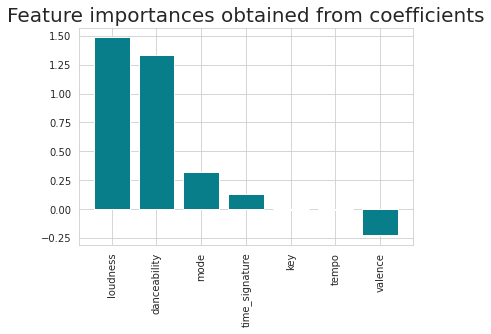

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()